<a href="https://colab.research.google.com/github/priyadarshighosh/Study-DL-Everyday/blob/main/DL_backpropagation_regression_DAY8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying BAACKWARD PROPAGATION IN REGRESSION

##(MANUALLY)##

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Making our own Dataset

In [ ]:
df=pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]],columns=['cgpa', 'profile_score', 'lpa'])
df

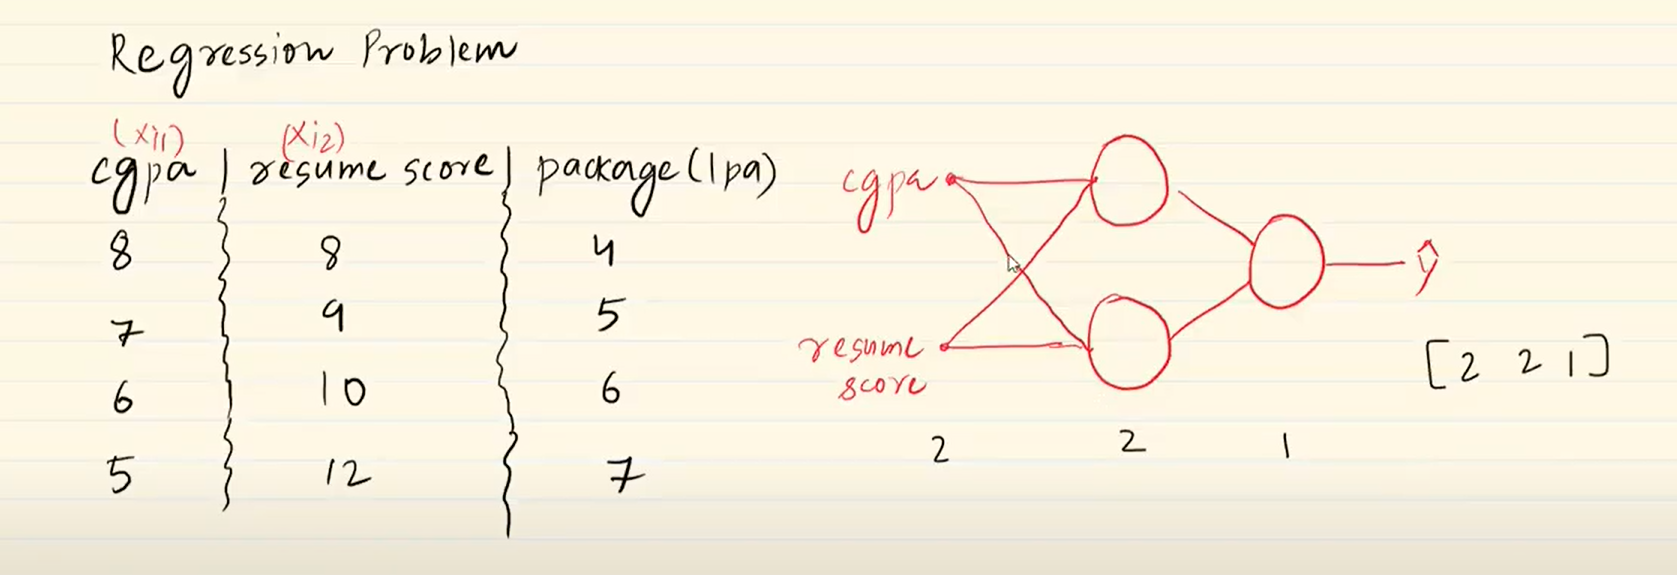

In [ ]:
#it is gonna  create 6 weights and 3 biases we have initialized weights as 0.1 and we have initialized biases as 0

In [ ]:
def initialize_parameters(layer_dims):                          #here we have to send the architechture of the ANN
                                                               #for this one we have 2 in input 2 in hidden layer and 1 in output so 2 2 1
  np.random.seed(3)
  parameters = {}
  L= len(layer_dims)


  for l in range(1,L):
    parameters['W' + str(l)] = np.ones((layer_dims[l-1],layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l],1))

  return parameters

Sending the architechture of the neural network

In [ ]:
initialize_parameters([2,2,1])

W1 has the weights from the input of the hidden layer 4 weights
b1 has the 2 biases of the hidden layer


W2 has the  2 weights from the hudden layer to the output layer
b2 has the 1 bias of the output layer

In [ ]:
def linear_forward(A_prev,W,b):
                                                #this calculates the output of the given neuron
  Z = np.dot(W.T,A_prev) + b

  return Z

the output of the given neuron depends on 5 things here in our case


1.   2 input  ( cgpa & profile_score )
2.   2 weights
3.   1 bias



# Main function for Forward Propogation

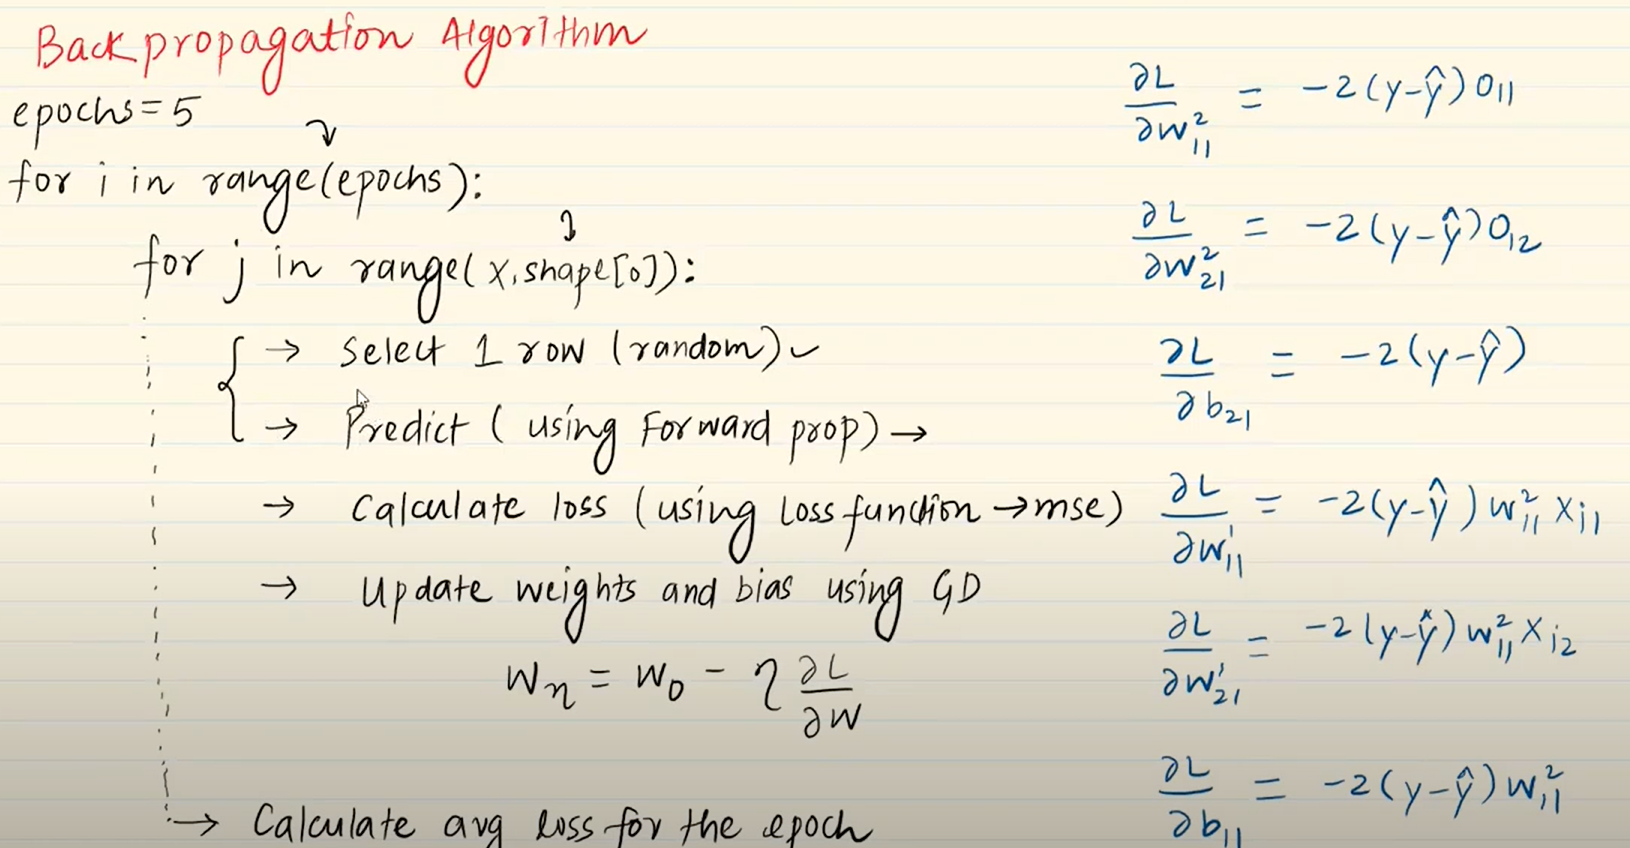

In [ ]:
def  L_layer_forward(X,parameters):

  A = X
  L = len(parameters)//2                              #no of layers in the neural networks

  for l in range(1,L+1):
    A_prev = A
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]

    print("A"+str(l-1)+":",A_prev)
    print("W"+str(l)+":",Wl)
    print("b"+str(l)+":",bl)
    print("--"*20)


    A = linear_forward(A_prev,Wl,bl)
    print("A"+str(l)+":",A)
    print("**"*20)

  return A,A_prev

In [ ]:
#we did the first 2 steps of the Loop

WE are sending the details of the 1st students / parameters of the first row
and the weigths and the biases

And this will predict for that perticular student/ row

In [ ]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape of feature , no of training example
y = df[['lpa']].values[0][0]

#Parameters innitializatio
#parameters = initialize_parameters9[2,2,1]

In [ ]:
X                                 #input for the first student

In [ ]:
y                                # output of the first student

In [ ]:
parameters= initialize_parameters([2,2,1])           #These are the paramters
parameters

In [ ]:
y_hat, A1 = L_layer_forward(X,parameters)          # this gonna give students details and weight and biases as parameters

A0 is the inputs w1 are the weights and b1 are the biases of the hidden layer

A1 is the output from the hidden layers after it received A0 , w1 and b1


A1 is the output from  the hidden layer to the output layer
W2 are the weights and b2 bias of the output layer


A2 is the main output from the output layer

# Calculating LOSS

In [ ]:
( y- 0.32 )**2                           #0.32 is the output of the output layer
                                          #y is the actual output and we are using MSE SO WE square it
                                          #MSE = mean squared error

In [ ]:
y_hat

In [ ]:
A1

# Updating the Weights and Biases


We gonna update the weights and biases from all the 9 parameters

**USING DIFFERENTIATION CHAIN RULE **

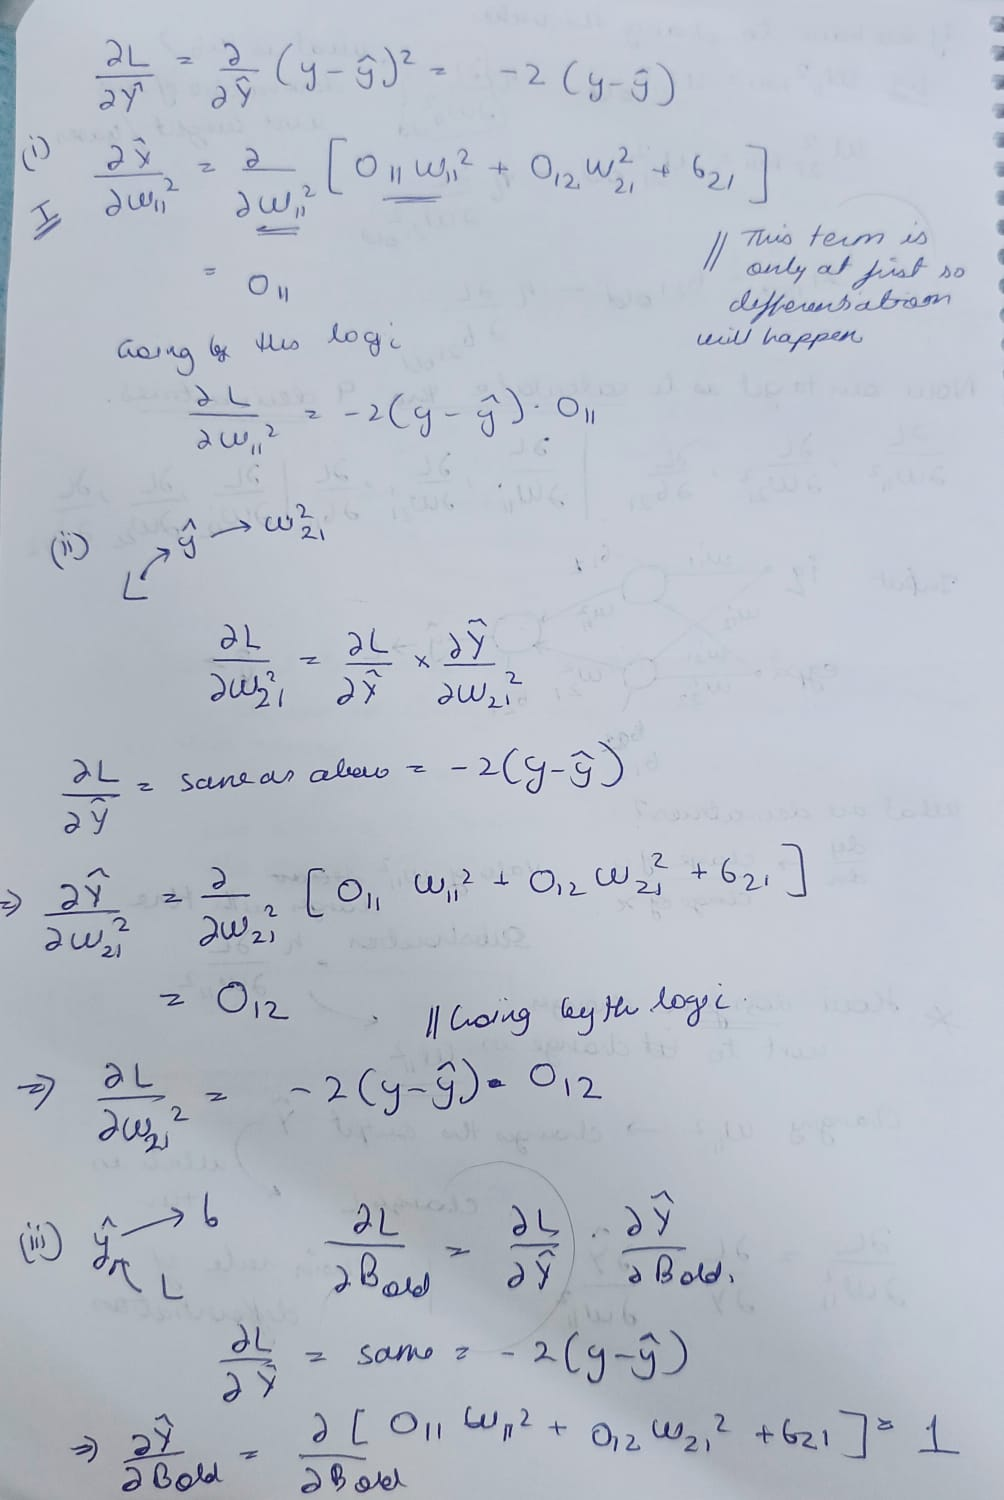

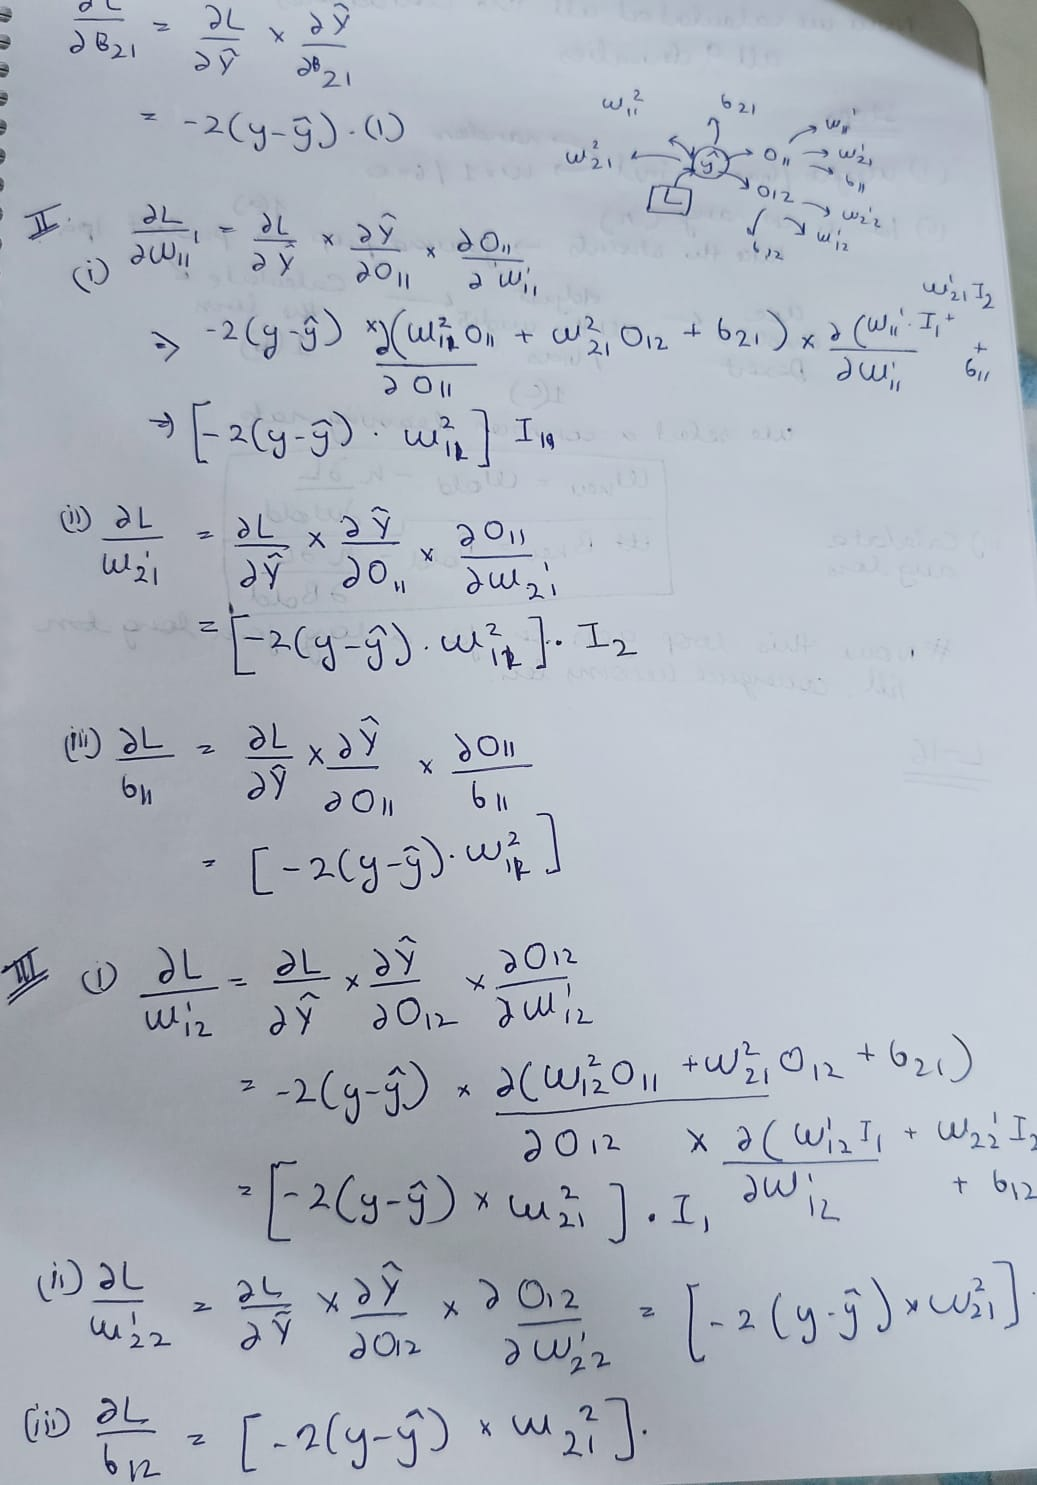

In [ ]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

updating of weights and Biases

We took the :

learning rate as 0.001  
parameters are the weight and biases

A1  out the hidden layer

y= current lpa package of the student
y_hat = predicted lpa package

X is the input

In [ ]:
update_parameters(parameters,y,y_hat,A1,X)

Now after updating the paramters

In [ ]:
parameters                 #it has changed from the previous values

Now first student is DONE


JUST LIKE THIS WE WILL GO TO THE 2ND STUDENT
THEN 3RD STUDENT AND SO ON

FOR the 1ST student

In [ ]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)                  #FORWARD PROPAGATION
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)                 #UPDATING THE VALUE

parameters                                                  #PRINTING THE PARAMTERS

FOR THE 2ND STUDENT

In [ ]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[1][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)                #FORWARD PROPAGATION
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)              #updating the value

parameters

FOR THE 3RD STUDENT

In [ ]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[2][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

FOR THE 4TH STUDENT

In [ ]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[3][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

# EPOCH IMPLEMENTATION

here the internal loop goes for 4 times for all the 4 students predicting their lpa

And totally epochs = 5 so it will take the average of the 5 times implementation

In [ ]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 5

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['lpa']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append((y-y_hat)**2)

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters